# Exploring the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/blogtext.csv")

## General info about dataset

In [3]:
df.head()

id gender  age              topic      sign          date  \
0  2059027   male   15            Student       Leo   14,May,2004   
1  2059027   male   15            Student       Leo   13,May,2004   
2  2059027   male   15            Student       Leo   12,May,2004   
3  2059027   male   15            Student       Leo   12,May,2004   
4  3581210   male   33  InvestmentBanking  Aquarius  11,June,2004   

                                                text  
0             Info has been found (+/- 100 pages,...  
1             These are the team members:   Drewe...  
2             In het kader van kernfusie op aarde...  
3                   testing!!!  testing!!!            
4               Thanks to Yahoo!'s Toolbar I can ...

In [4]:
# from `df.info()` we can see that there are no `NULL` columns since shape of 
# the dataframe is the same as the count of the `non NULL` columns
print(df.shape)
df.info()

(681284, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
id        681284 non-null int64
gender    681284 non-null object
age       681284 non-null int64
topic     681284 non-null object
sign      681284 non-null object
date      681284 non-null object
text      681284 non-null object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [5]:
# describe for text fields only
df.describe(include=np.object)

gender   topic    sign            date                 text
count   681284  681284  681284          681284               681284
unique       2      40      12            2616               611652
top       male  indUnk  Cancer  02,August,2004           urlLink   
freq    345193  251015   65048           16544                  445

## More detailed info about age column

In [6]:
# descriptive statistics for age field
df["age"].describe()

count    681284.000000
mean         23.932326
std           7.786009
min          13.000000
25%          17.000000
50%          24.000000
75%          26.000000
max          48.000000
Name: age, dtype: float64

In [7]:
# sorted by age value
df["age"].value_counts().sort_index(ascending=True)

# sorted by age counts
# df["age"].value_counts().sort_values(ascending=False) 

13    13133
14    27400
15    41767
16    72708
17    80859
23    72889
24    80071
25    67051
26    55312
27    46124
33    17584
34    21347
35    17462
36    14229
37     9317
38     7545
39     5556
40     5016
41     3738
42     2908
43     4230
44     2044
45     4482
46     2733
47     2207
48     3572
Name: age, dtype: int64

## More detailed info about unique authors

In [8]:
df["id"].value_counts()

449628     4221
734562     2301
589736     2294
1975546    2261
958176     2244
           ... 
3993280       1
3483063       1
4165047       1
3575447       1
3599127       1
Name: id, Length: 19320, dtype: int64

## More detailed info about genders

In [9]:
df["gender"].value_counts()

male      345193
female    336091
Name: gender, dtype: int64

# Num of data each age category (10 - 20, 20 - 30, 30 - 40, 40 - 50)

In [68]:
counts = df["age"].value_counts().sort_index(ascending=True)
def sumBetween(pairs, cond_lower, cond_upper):
    return pairs.loc[(pairs.index <= cond_upper) & (pairs.index >= cond_lower)].sum()

In [69]:
counts

13    13133
14    27400
15    41767
16    72708
17    80859
23    72889
24    80071
25    67051
26    55312
27    46124
33    17584
34    21347
35    17462
36    14229
37     9317
38     7545
39     5556
40     5016
41     3738
42     2908
43     4230
44     2044
45     4482
46     2733
47     2207
48     3572
Name: age, dtype: int64

In [70]:
sumBetween(counts, 10, 19)

235867

In [71]:
sumBetween(counts, 23, 27)

321447

In [76]:
sumBetween(counts, 30, 37)

79939

In [77]:
sumBetween(counts, 38, 48)

44031

In [74]:
import matplotlib.pyplot as plt

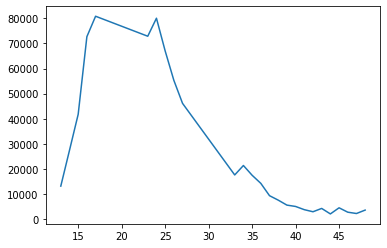

In [75]:
plt.plot(counts.index.to_numpy(), counts.values)
plt.show()